In [1]:
import os
os.chdir('JQ/PI-SDE')
import pandas as pd
import torch
import matplotlib.pyplot as plt
from types import SimpleNamespace
import numpy as np
from src.evaluation import derive_model
from sklearn.externals import joblib
import seaborn as sns

/home/shaokun/anaconda3/envs/py-prescient37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
path = "RESULTS/Weinreb/none-softplus-400_400-0.5-const-0.1-0.1-0.005/seed_0/alltime/config.pt"
config = SimpleNamespace(**torch.load(path))
model, x, y, device = derive_model(config, ckpt_name = 'epoch_003000')

def derive_last(x_0):
    ts = [0,2]
    y_ts = [np.float64(y[ts_i]) for ts_i in ts ]
    r_0 = torch.zeros(x_0.shape[0]).unsqueeze(1)
    x_r_0 = torch.cat([x_0,r_0], dim=1)
    x_r_0 = x_r_0.to(device)
    x_T = model(y_ts, x_r_0)[-1][:,0:-1]
    return x_T

In [5]:
mlp_loaded = joblib.load('data/Weinreb/alltime_onlyLineage/Perturb/Cluster/ann_classifier_model.pkl')
# {'Monocyte': 0, 'Neutrophil': 1, 'others': 2}
def derive_ratios(X):
    X = X.cpu().detach().numpy()
    y_pred = mlp_loaded.predict(X)
    
    label_Mon = (y_pred == 0).sum()
    label_Neu = (y_pred == 1).sum()
    label_Mon_ratio = label_Mon / len(y_pred)
    label_Neu_ratio = label_Neu / len(y_pred)
    return label_Mon_ratio, label_Neu_ratio

### Monocyte

In [6]:
row_names = ['unp.','2','5','10','-0.5','-2','-2.5','-5']
Mons = pd.DataFrame(columns=[f'seed{i}' for i in range(10)], index=row_names)
Neus = pd.DataFrame(columns=[f'seed{i}' for i in range(10)], index=row_names)
for gene in ['Irf8', 'Klf4']:
    globals()[f'Mons_{gene}'] = Mons.copy()
    globals()[f'Neus_{gene}'] = Neus.copy()
    perturb_pathh = 'data/Weinreb/alltime_onlyLineage/Perturb/Monocyte/' + gene
    for seed in range(10):
        Mon_ratios_oneseed = []
        Neu_ratios_oneseed = []
        for file in ['unperturbed.pt','over_2.pt','over_5.pt','over_10.pt','under_0.5.pt','under_1.pt','under_2.5.pt','under_5.pt']:
            path = perturb_pathh + '/' + 'seed' + str(seed) + '/' + file
            perturb_data = torch.load(path)['xp']
            perturb_last = derive_last(perturb_data)
            label_Mon_ratio, label_Neu_ratio = derive_ratios(perturb_last)
            Mon_ratios_oneseed.append(label_Mon_ratio)
            Neu_ratios_oneseed.append(label_Neu_ratio)
        globals()[f'Mons_{gene}'][seed] = Mon_ratios_oneseed
        globals()[f'Neus_{gene}'][seed] = Neu_ratios_oneseed

### Neutrophil

In [7]:
row_names = ['unp.','2','5','10','-0.5','-2','-2.5','-5']
Mons = pd.DataFrame(columns=[f'seed{i}' for i in range(10)], index=row_names)
Neus = pd.DataFrame(columns=[f'seed{i}' for i in range(10)], index=row_names)
for gene in ['Cebpe', 'Dach1']:
    globals()[f'Mons_{gene}'] = Mons.copy()
    globals()[f'Neus_{gene}'] = Neus.copy()
    perturb_pathh = 'data/Weinreb/alltime_onlyLineage/Perturb/Neutrophil/' + gene
    for seed in range(10):
        Mon_ratios_oneseed = []
        Neu_ratios_oneseed = []
        for file in ['unperturbed.pt','over_2.pt','over_5.pt','over_10.pt','under_0.5.pt','under_1.pt','under_2.5.pt','under_5.pt']:
            path = perturb_pathh + '/' + 'seed' + str(seed) + '/' + file
            perturb_data = torch.load(path)['xp']
            perturb_last = derive_last(perturb_data)
            label_Mon_ratio, label_Neu_ratio = derive_ratios(perturb_last)
            Mon_ratios_oneseed.append(label_Mon_ratio)
            Neu_ratios_oneseed.append(label_Neu_ratio)
        globals()[f'Mons_{gene}'][seed] = Mon_ratios_oneseed
        globals()[f'Neus_{gene}'][seed] = Neu_ratios_oneseed



### non-TF

In [8]:
row_names = ['unp.','2','5','10','-0.5','-2','-2.5','-5']
Mons = pd.DataFrame(columns=[f'seed{i}' for i in range(10)], index=row_names)
Neus = pd.DataFrame(columns=[f'seed{i}' for i in range(10)], index=row_names)
for gene in ['Dhrs2', 'Sgk1']:
    globals()[f'Mons_{gene}'] = Mons.copy()
    globals()[f'Neus_{gene}'] = Neus.copy()
    perturb_pathh = 'data/Weinreb/alltime_onlyLineage/Perturb/non-TF/' + gene
    for seed in range(10):
        Mon_ratios_oneseed = []
        Neu_ratios_oneseed = []
        for file in ['unperturbed.pt','over_2.pt','over_5.pt','over_10.pt','under_0.5.pt','under_1.pt','under_2.5.pt','under_5.pt']:
            path = perturb_pathh + '/' + 'seed' + str(seed) + '/' + file
            perturb_data = torch.load(path)['xp']
            perturb_last = derive_last(perturb_data)
            label_Mon_ratio, label_Neu_ratio = derive_ratios(perturb_last)
            Mon_ratios_oneseed.append(label_Mon_ratio)
            Neu_ratios_oneseed.append(label_Neu_ratio)
        globals()[f'Mons_{gene}'][seed] = Mon_ratios_oneseed
        globals()[f'Neus_{gene}'][seed] = Neu_ratios_oneseed

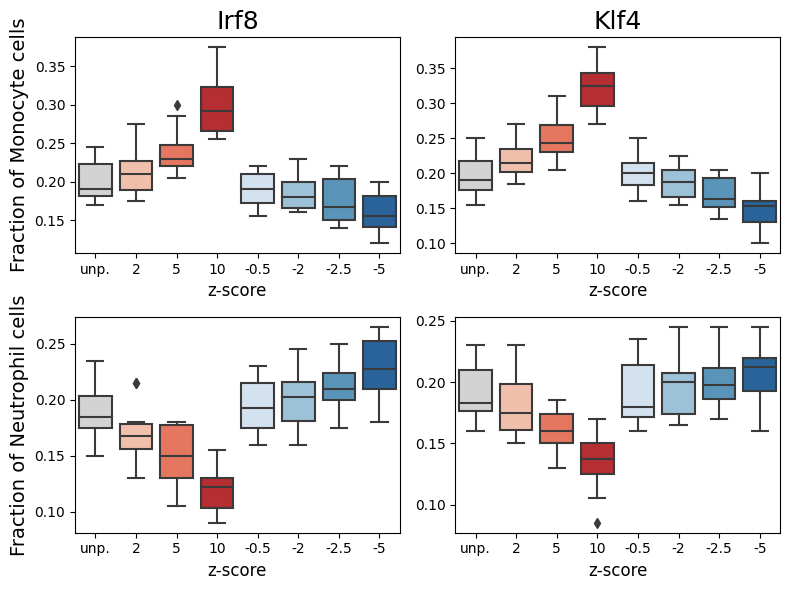

In [36]:
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','skyblue']
colors = ['lightgrey']+ sns.color_palette("Reds", n_colors=3).as_hex() + sns.color_palette("Blues", n_colors=4).as_hex() 

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i,gene in enumerate(['Irf8', 'Klf4']):
    Mons_melted = globals()[f'Mons_{gene}'].reset_index().melt(id_vars='index', var_name='seed', value_name='value')
    Neus_melted = globals()[f'Neus_{gene}'].reset_index().melt(id_vars='index', var_name='seed', value_name='value')

    sns.boxplot(x='index', y='value', data=Mons_melted, ax=axs[0,i], palette=colors)
    axs[0,i].set_xlabel('z-score',fontsize=12)
    if i == 0:
        axs[0,i].set_ylabel('Fraction of Monocyte cells',fontsize=14)
    else:
        axs[0,i].set_ylabel('')
    axs[0,i].set_title(gene,fontsize=18)

    sns.boxplot(x='index', y='value', data=Neus_melted, ax=axs[1,i], palette=colors)
    axs[1,i].set_xlabel('z-score',fontsize=12)
    if i == 0:
        axs[1,i].set_ylabel('Fraction of Neutrophil cells',fontsize=14)
    else:
        axs[1,i].set_ylabel('')

plt.tight_layout()
plt.show()

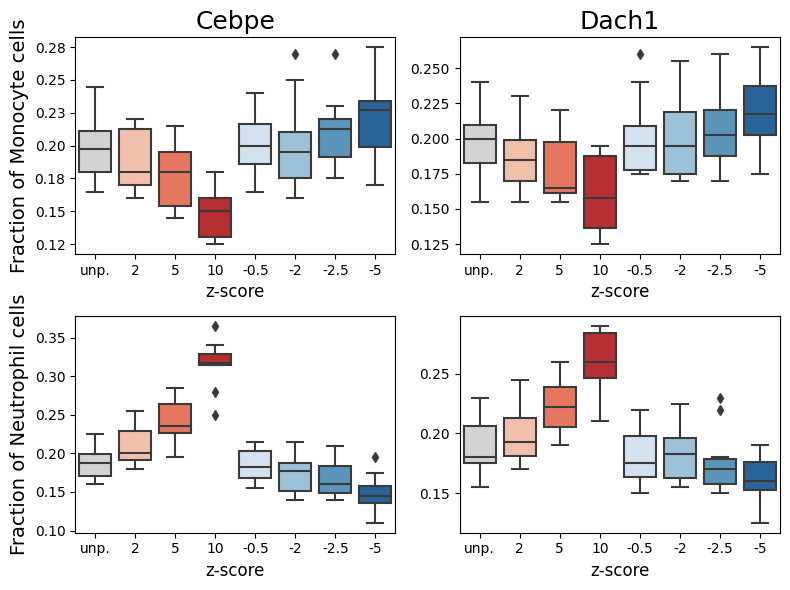

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i,gene in enumerate(['Cebpe',  'Dach1']):
    Mons_melted = globals()[f'Mons_{gene}'].reset_index().melt(id_vars='index', var_name='seed', value_name='value')
    Neus_melted = globals()[f'Neus_{gene}'].reset_index().melt(id_vars='index', var_name='seed', value_name='value')

    sns.boxplot(x='index', y='value', data=Mons_melted, ax=axs[0,i], palette=colors)
    axs[0,i].set_xlabel('z-score',fontsize=12)
    if i==0:
        axs[0,i].set_ylabel('Fraction of Monocyte cells',fontsize=14)
        axs[0,i].yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

    else:
        axs[0,i].set_ylabel('')
    axs[0,i].set_title(gene,fontsize=18)

    sns.boxplot(x='index', y='value', data=Neus_melted, ax=axs[1,i], palette=colors)
    axs[1,i].set_xlabel('z-score',fontsize=12)
    if i == 0:
        axs[1,i].set_ylabel('Fraction of Neutrophil cells',fontsize=14)
    else:
        axs[1,i].set_ylabel('')

plt.tight_layout()
plt.show()

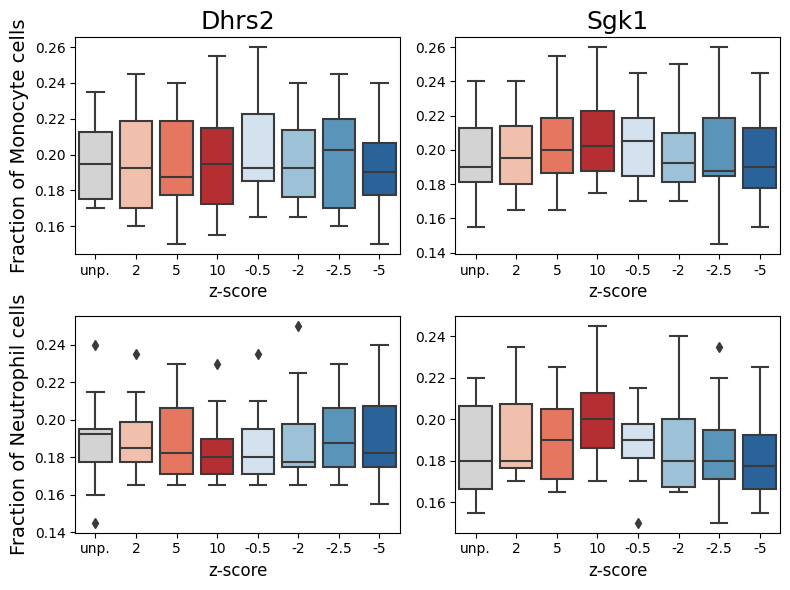

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i,gene in enumerate(['Dhrs2', 'Sgk1']):
    Mons_melted = globals()[f'Mons_{gene}'].reset_index().melt(id_vars='index', var_name='seed', value_name='value')
    Neus_melted = globals()[f'Neus_{gene}'].reset_index().melt(id_vars='index', var_name='seed', value_name='value')

    sns.boxplot(x='index', y='value', data=Mons_melted, ax=axs[0,i], palette=colors)
    axs[0,i].set_xlabel('z-score',fontsize=12)
    if i == 0:
        axs[0,i].set_ylabel('Fraction of Monocyte cells',fontsize=14)
    else:
        axs[0,i].set_ylabel('')
    axs[0,i].set_title(gene,fontsize=18)

    sns.boxplot(x='index', y='value', data=Neus_melted, ax=axs[1,i], palette=colors)
    axs[1,i].set_xlabel('z-score',fontsize=12)
    if i == 0:
        axs[1,i].set_ylabel('Fraction of Neutrophil cells',fontsize=14)
    else:
        axs[1,i].set_ylabel('')

plt.tight_layout()
plt.show()